<a href="https://colab.research.google.com/github/albarrazikrillah14/PCD-PRAKTIKUM/blob/main/PCD7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[[107.         1.012291]]
banyak lines =  46

 Original Image


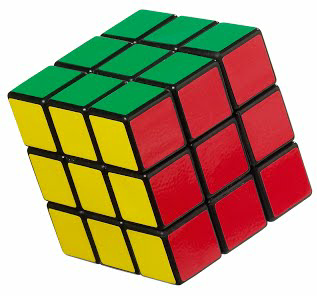


 Hough Lines Transform Image


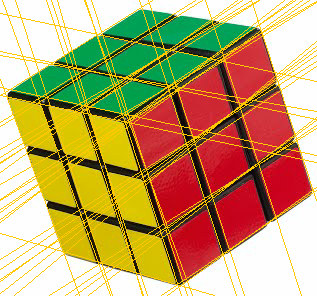

In [30]:
img = cv2.imread('/content/drive/MyDrive/PCD/7/cubes.png')
output_img = img.copy()
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,200,220)

lines = cv2.HoughLines(edges, rho=2, theta=np.pi/90, threshold=100, srn=0, stn=50,
                      min_theta=0, max_theta=np.pi) 

# oVERWRITING--> OUTPUT_img
for i in range(0, len(lines)):
    rho = lines[i][0][0]
    theta = lines[i][0][1]
    a = math.cos(theta) # sudut
    b = math.sin(theta) # sudut
    x0 = a*rho # Sumbu X
    y0 = b*rho # Sumbu Y
    # Note : angka 1000 = konstanta/pengalinya.
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(output_img,(x1,y1),(x2,y2),(0,200,255))

print(lines[0])
print("banyak lines = ",len(lines))
print("\n Original Image")
cv2_imshow(img)
print("\n Hough Lines Transform Image")
cv2_imshow(output_img)


cx: 1246, cy: 398, radius: 135
cx: 512, cy: 484, radius: 136
cx: 824, cy: 610, radius: 92
cx: 800, cy: 360, radius: 165
cx: 488, cy: 498, radius: 164
cx: 1238, cy: 464, radius: 188
cx: 1372, cy: 518, radius: 196
cx: 250, cy: 640, radius: 104
cx: 1498, cy: 620, radius: 94
cx: 92, cy: 350, radius: 182
cx: 454, cy: 476, radius: 148
cx: 1480, cy: 606, radius: 101
cx: 934, cy: 352, radius: 106
cx: 1228, cy: 428, radius: 100
cx: 1004, cy: 552, radius: 112
cx: 1012, cy: 524, radius: 111
cx: 782, cy: 450, radius: 50
cx: 1454, cy: 598, radius: 88
cx: 1428, cy: 360, radius: 43
cx: 492, cy: 446, radius: 96
cx: 1464, cy: 620, radius: 121
cx: 760, cy: 308, radius: 46
cx: 386, cy: 376, radius: 150
cx: 22, cy: 524, radius: 44
cx: 222, cy: 644, radius: 124
cx: 970, cy: 530, radius: 84
cx: 812, cy: 400, radius: 121
cx: 1214, cy: 352, radius: 80
cx: 148, cy: 488, radius: 56
cx: 554, cy: 478, radius: 96
cx: 466, cy: 460, radius: 84
cx: 554, cy: 516, radius: 84
cx: 1050, cy: 370, radius: 76
cx: 172, cy: 5

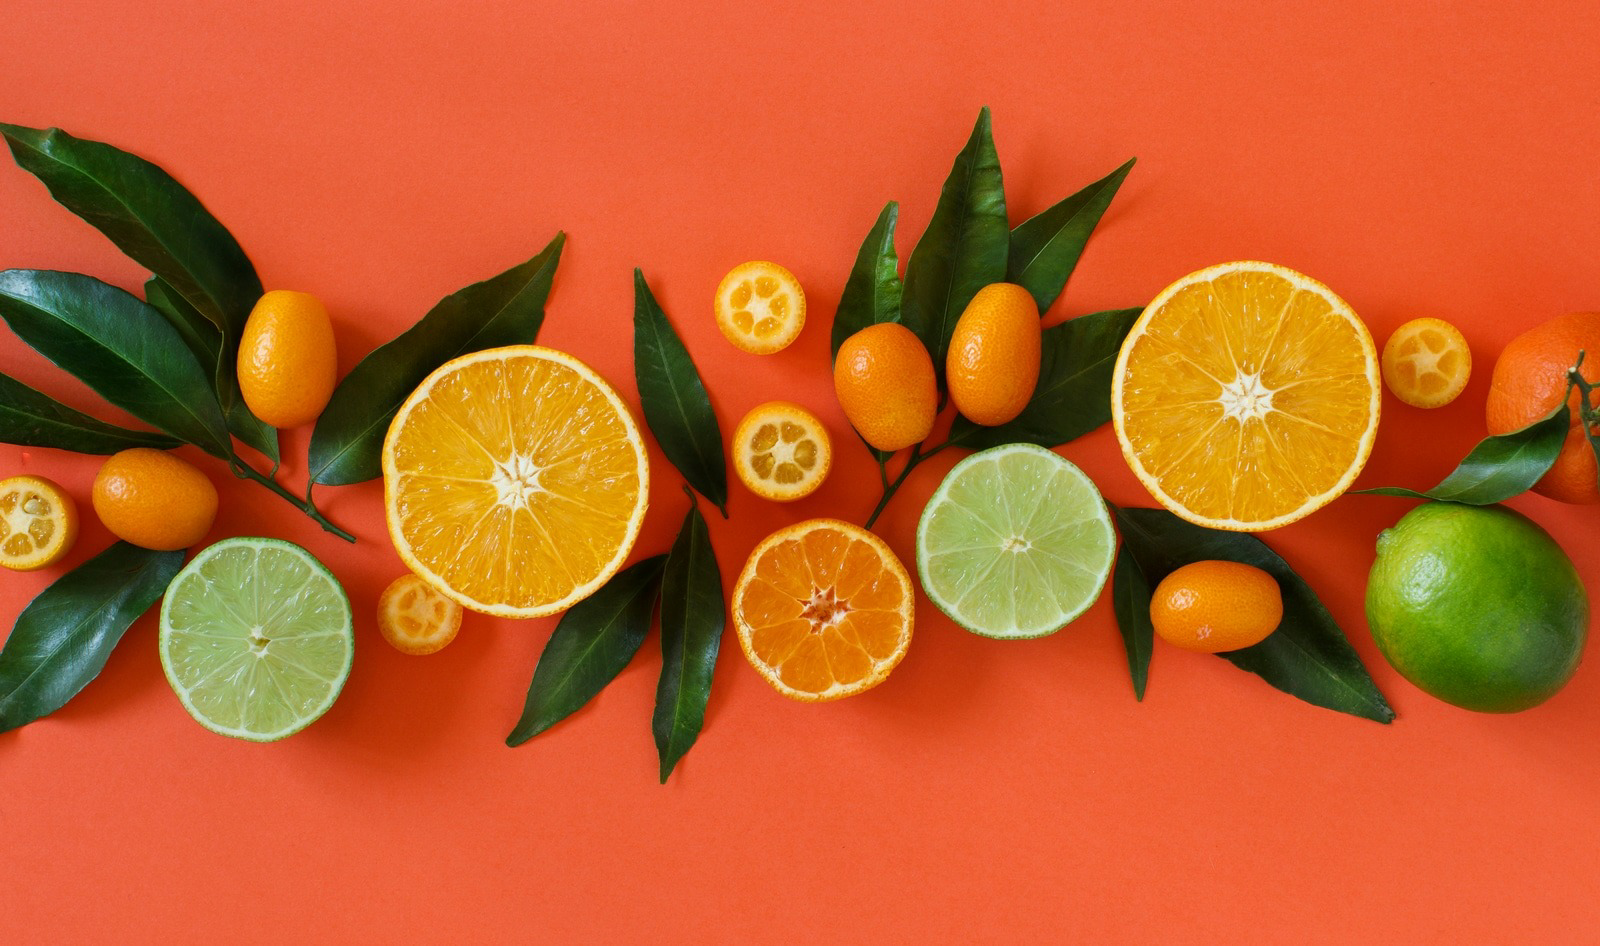


Hough Transform Circle Image


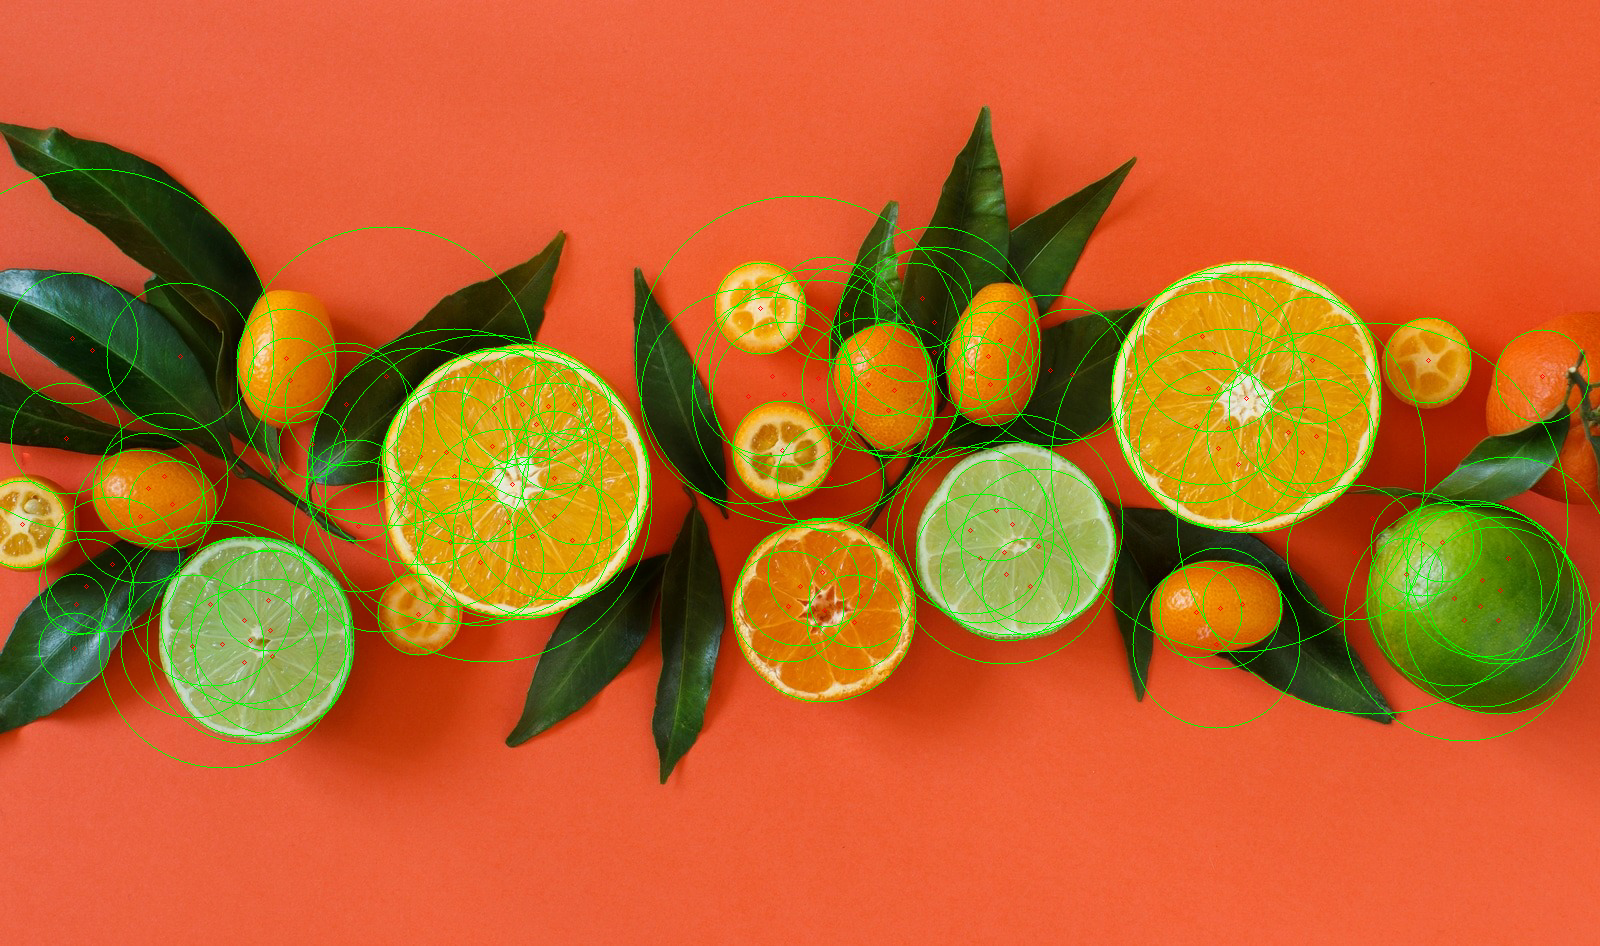

In [58]:
img = cv2.imread('/content/drive/MyDrive/PCD/7/citrus_1.png')
output_img = img.copy()

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray,11)

circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT,dp=1,minDist=20,param1=20,param2=50,minRadius=0,maxRadius=200)
circles = np.uint16(np.around(circles))

counter = 0
for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(output_img,(i[0],i[1]),i[2],(0,255,0))
  # draw the center of the circle
  cv2.circle(output_img,(i[0],i[1]),2,(0,0,255))
  print("cx: {}, cy: {}, radius: {}".format(i[0],i[1], i[2]))
  counter = counter + 1

print(counter)

print("Original image\n")
cv2_imshow(img)
print("\nHough Transform Circle Image")
cv2_imshow(output_img)